## Objective: Put qubit in superposition and measure it.

##### important note:

|0⟩ =
[
1
0
]

|1⟩ =
[
0
1
]

#### imports

In [16]:
from qiskit import QuantumCircuit, assemble, Aer, execute, IBMQ, __qiskit_version__
from qiskit.providers.ibmq import least_busy
from qiskit.tools import job_monitor
from qiskit_textbook.tools import array_to_latex
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi

print(__qiskit_version__)

{'qiskit-terra': '0.16.4', 'qiskit-aer': '0.7.6', 'qiskit-ignis': '0.5.2', 'qiskit-ibmq-provider': '0.12.1', 'qiskit-aqua': '0.8.2', 'qiskit': '0.24.0'}


#### create qubit

In [17]:
# Create qubit.
qubit = QuantumCircuit(1, 1)
qubit.h(0)    # Put first qubit in superposition
qubit.measure(0, 0)

# Create object.
qobj = assemble(qubit)

#### wave function  of qubit:
<img src='wave_function.gif'>

#### create helper function to run simulations

In [18]:
class Simulate:
    def __init__(self, circuit, simulator):
        self.circuit = circuit
        self.simulator = simulator

    def execute_circuit_sv(self):
        sv_sim = Aer.get_backend('statevector_simulator')

        result = execute(self.circuit, sv_sim).result()

        state = result.get_statevector(self.circuit)
        circuit_diagram = self.circuit.draw('mpl')
        bloch_sphere = plot_bloch_multivector(state)

        return circuit_diagram, state, bloch_sphere
    
    def execute_circuit_qasm(self):
        qasm_sim = Aer.get_backend('qasm_simulator')

        result = execute(qubit, qasm_sim, shots=100).result()
        counts = result.get_counts(self.circuit)
        circuit_diagram = self.circuit.draw('mpl')
        histogram = plot_histogram(counts)

        return circuit_diagram, counts, histogram
    
    def execute_circuit_qcomp(self):
        IBMQ.load_account()

        provider = IBMQ.get_provider('ibm-q')

        # Get least busy computer.
        qcomp = least_busy(provider.backends(simulator=False))
        print('Running on', qcomp)

        job = execute(qubit, backend=qcomp)
        job_monitor(job)

        result = job.result()
        return plot_histogram(result.get_counts())
    
    def __call__(self):
        if self.simulator == 'statevector':
            return self.execute_circuit_sv()
        elif self.simulator == 'qasm':
            return self.execute_circuit_qasm()
        elif self.simulator == 'qcomp' or self.simulator == 'quantum computer':
            return self.execute_circuit_qcomp()
        else:
            raise NameError(f"Simulator '{self.simulator}' is not an option.")
        

circuit_diagram, state, bloch_sphere = Simulate(qubit, 'statevector')()
circuit_diagram, counts, histogram = Simulate(qubit, 'qasm')()

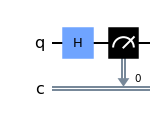

In [19]:
circuit_diagram

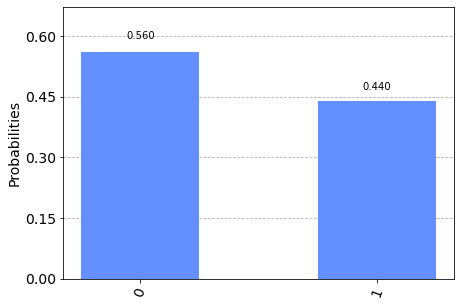

In [20]:
histogram

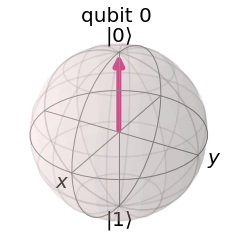

In [21]:
bloch_sphere

ibmqfactory.load_account:WARNING:2021-05-15 17:23:38,379: Credentials are already in use. The existing account in the session will be replaced.


Running on ibmq_armonk
Job Status: job has successfully run


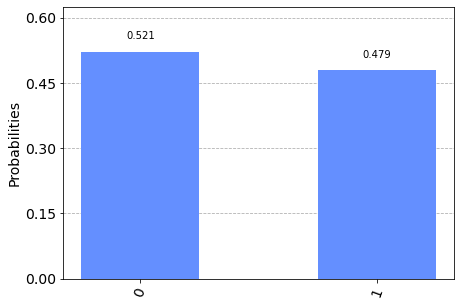

In [22]:
qcomp_histogram = Simulate(qubit, 'qcomp')()
qcomp_histogram